Blog Link: https://medium.com/deep-learning-data-2040-kw/cnn-with-keras-b3c50334298d

In [38]:
import keras
keras.__version__

'2.1.5'

In [40]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/kaiwomb/Desktop/data2040/deep-learning/simpsons/'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/kaiwomb/Desktop/data2040/deep-learning/simpsons-small/'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_bart_dir = os.path.join(train_dir, 'bart')
os.mkdir(train_bart_dir)

# Directory with our training dog pictures
train_homer_dir = os.path.join(train_dir, 'homer')
os.mkdir(train_homer_dir)

# Directory with our validation cat pictures
validation_bart_dir = os.path.join(validation_dir, 'bart')
os.mkdir(validation_bart_dir)

# Directory with our validation dog pictures
validation_homer_dir = os.path.join(validation_dir, 'homer')
os.mkdir(validation_homer_dir)

# Directory with our validation cat pictures
test_bart_dir = os.path.join(test_dir, 'bart')
os.mkdir(test_bart_dir)

# Directory with our validation dog pictures
test_homer_dir = os.path.join(test_dir, 'homer')
os.mkdir(test_homer_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['bart_{}.jpg'.format(i) for i in range(0, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bart_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['bart_{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bart_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['bart_{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bart_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_homer_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_homer_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['homer_{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_homer_dir, fname)
    shutil.copyfile(src, dst)

In [41]:
print('total training bart images:', len(os.listdir(train_bart_dir)))

total training bart images: 750


In [42]:
print('total training homer images:', len(os.listdir(train_homer_dir)))

total training homer images: 750


In [43]:
print('total validation bart images:', len(os.listdir(validation_bart_dir)))

total validation bart images: 250


In [44]:
print('total validation homer images:', len(os.listdir(validation_homer_dir)))

total validation homer images: 250


In [45]:
print('total test bart images:', len(os.listdir(test_bart_dir)))

total test bart images: 250


In [46]:
print('total test homer images:', len(os.listdir(test_homer_dir)))

total test homer images: 250


In [47]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [49]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [50]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [52]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 117s 1s/step - loss: 0.5517 - acc: 0.7165 - val_loss: 0.5068 - val_acc: 0.7580
Epoch 2/10
100/100 [==============================] - 117s 1s/step - loss: 0.4301 - acc: 0.7980 - val_loss: 0.3711 - val_acc: 0.8360
Epoch 3/10
100/100 [==============================] - 117s 1s/step - loss: 0.3726 - acc: 0.8325 - val_loss: 0.3472 - val_acc: 0.8400
Epoch 4/10
100/100 [==============================] - 117s 1s/step - loss: 0.3073 - acc: 0.8700 - val_loss: 0.3726 - val_acc: 0.8200
Epoch 5/10
100/100 [==============================] - 117s 1s/step - loss: 0.2726 - acc: 0.8790 - val_loss: 0.3055 - val_acc: 0.8600
Epoch 6/10
100/100 [==============================] - 137s 1s/step - loss: 0.2426 - acc: 0.9040 - val_loss: 0.3450 - val_acc: 0.8300
Epoch 7/10
100/100 [==============================] - 133s 1s/step - loss: 0.2079 - acc: 0.9120 - val_loss: 0.2936 - val_acc: 0.8640
Epoch 8/10
100/100 [==============================] - 120s 1s/step - 

In [53]:
model.save('bart_and_homer_small_1.h5')

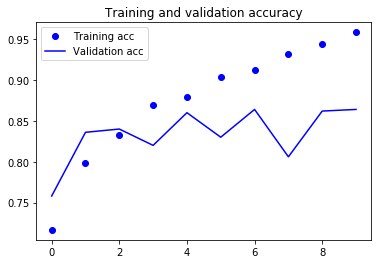

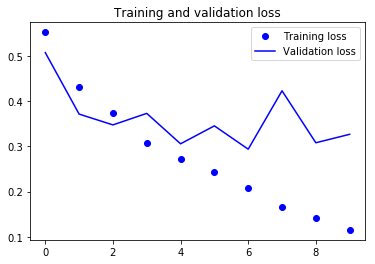

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

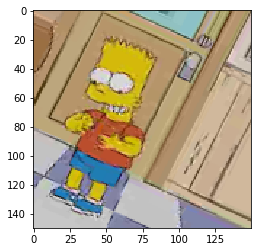

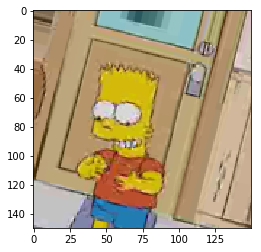

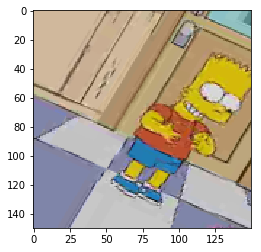

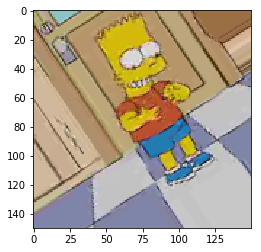

In [57]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_bart_dir, fname) for fname in os.listdir(train_bart_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 202s 2s/step - loss: 0.6322 - acc: 0.6423 - val_loss: 0.4974 - val_acc: 0.7743
Epoch 2/10
100/100 [==============================] - 199s 2s/step - loss: 0.5578 - acc: 0.7158 - val_loss: 0.4262 - val_acc: 0.8037
Epoch 3/10
100/100 [==============================] - 199s 2s/step - loss: 0.5191 - acc: 0.7479 - val_loss: 0.4040 - val_acc: 0.8050
Epoch 4/10
100/100 [==============================] - 217s 2s/step - loss: 0.4950 - acc: 0.7673 - val_loss: 0.3642 - val_acc: 0.8280
Epoch 5/10
100/100 [==============================] - 200s 2s/step - loss: 0.4777 - acc: 0.7736 - val_loss: 0.4392 - val_acc: 0.8063
Epoch 6/10
100/100 [==============================] - 209s 2s/step - loss: 0.4574 - acc: 0.7902 - val_loss: 0.3488 - val_acc: 0.8395
Epoch 7/10
100/100 [==============================] - 195s 2s/step - loss: 0.4470 - acc: 0.7924 - val_loss: 0.3623 - va

In [61]:
model.save('bart_and_homer_small_2.h5')

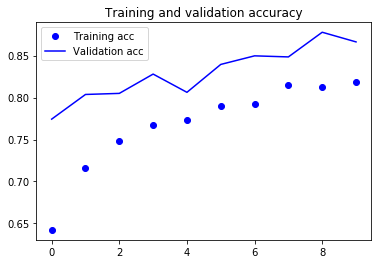

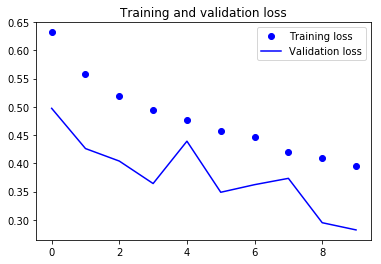

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()